# Response Themes for "What needs in your workflow does Jupyter Notebook address?"

* Goal: Extract theme keywords from `workflow_needs_addressed` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Strawman process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [4]:
rs = np.random.RandomState(123)

In [5]:
pd.set_option('max_colwidth', 1000)

In [6]:
df = pd.read_csv('survey_short_columns.csv')

In [7]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [8]:
responses = pd.concat([df.workflow_needs_addressed_1, df.workflow_needs_addressed_2, df.workflow_needs_addressed_3], 
                       ignore_index=True)

In [9]:
assert len(responses) == len(df) * 3

In [10]:
responses.isnull().value_counts()

True     3565
False    1553
dtype: int64

In [11]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below 5 times and manually built up the initial set of keywords seen commonly across them. This time, I did not form groupings. The keywords felt sufficient on their own to describe what needs Jupyter was satisfying.

In [119]:
show(responses.sample(20, random_state=rs))

0) Learning by doing 

1) cython scripting

2) Scratch pad for code experiments 

3) Reporting

4) easy sharing via pdf/html files for sending to colleagues for feedback

5) Quick data analysis

6) reproducibility of analysis results

7) Documenting and sharing numerical experiments in Julia.

8) Initial data exploration and analysis

9) REPL

10) plotting data

11) debugging

12) Quickly prototyping analysis code

13) Reporting

14) prototyping

15) Rapid loading and exploring of data

16) data exploration

17) Reproducibility

18) Demonstrations for teaching

19) Sharing work output through nbviewer



In [120]:
themes = {
    'needs_addressed': ['data science', 'documentation', 'integration', 'live', 'visual', 'classfication', 'present', 
                        'visuali(s|z)', 'document', 'explor', 'install', 'network', 'viz', 'experiment', 'python', 
                        'document', 'network', 'viz', 'quick', 'share', 'illustrate', 'prototyp', 'trying out', 
                        'organization', 'writing',  'simulations', 'interactive', 'portabl',
                        'charts', 'multi', 'parsing', 'graph', 'mixing', 'debug', 'test', 
                        'showcase', 'explain', 'report', 'reproduc',
                        'one-?off', 'publish', 'analy(s|z)', 'hack', 'iterat', 'early', 'teach', 
                        'repeat', 'ideas', 'captur',
                        'instruct', 'shell', 'educat', 'notes', 'troubleshoot', 'agil(ity|e)']
}

## Coverage Improvement

I next ran the code below to improve the number of responses covered by the keywords. I iterated here to drive down the number of responses without any keywords identified.

In [20]:
import re

In [93]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [94]:
def tag_themes(data, themes):
    tagged = data.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = data.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [112]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

all 1475


1    1475
0      78
Name: themes, dtype: int64

In [113]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,0,themes
1999,Doxumentation,
1926,import own scipts,
3257,Assignments and exams for my students,
4703,I code for fun. JN is fun!,
2323,code profiling,
26,"Inline, rich media display",
1524,EtL,
1925,Investigating standard libraries.,
2702,nice frontend,
268,Block Execution,


In [118]:
themes = {
    'needs_addressed' : ['data science', 'documentation', 'integration', 'live', 'visual', 'classfication', 'present', 
    'document', 'explor', 'install', 'network', 'viz', 'experiment', 'python', 'document', 'network', 'viz', 'quick',
    'shar(e|ing)', 'illustrate', 'prototyp', 'trying out', 'organization', 'writing', 'simulations', 'interact', 
    'portab(le|ility)', 'chart', 'multi', 'parsing', 'graph', 'mixing', 'debug', 'test', 'showcase',  
    'one-?off', 'publi(sh|cation)', 'analy(s|z)', 'hack', 'iterat', 'early', 'teach', 'repeat', 'ideas', 'captur',
    'instruct', 'shell', 'educat', 'note', 'troubleshoot', 'agil(ity|e)', 'communic', 'research', 'scratchpad',
    'increment', 'munging', 'remote', 'persist', 'literate', 'descrip', 'language', 'grading', 'plot', 'cloud',
    'big', 'spark', 'fast', 'excel', 'spreadsheet', 'visibl', 'markdown', 'repl', 'try', 'snippet', 'script',
    'cleans?', 'database', 'widget', 'anywhere', 'database', 'concept', 'simulation', 'intermediate', 'format',
    'develop', 'comput(ation|ing)', 'history', 'learning', 'excel', 'spreadsheet', 'draft', 'glue', 'together', 
    'show others', 'sandbox', 'tables', 'collab', 'workflow', 'story', 'poc', 'ide($|\W)', 'study', 'instant', 
    'tutorial', 'understand', 'combin(e|ing)', 'eas(y|e|ier|ily)', 'friendly', 'sanitiz', 'figure', 'cell', 'terminal', 
    'classroom', 'tweak', 'analytic', 'large', 'big', 'show code', 'image', 'data', 'playbook', 'automat', 
    'visuali(s|z)', 'report', 'reproduc', 'exercise', 'adoption', 'model', 'expla(in|nation)', 'demo', 'other people',
    'play', 'math', 'simpl(e|icity)', 'deploy', 'open source', 'dissem']
}

## Keyword Frequencies

Finally, I plotted the frequency counts of keywords identified.

In [81]:
import matplotlib
import seaborn

In [82]:
counts = {}

In [83]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [84]:
hist = pd.Series(counts).sort_values()

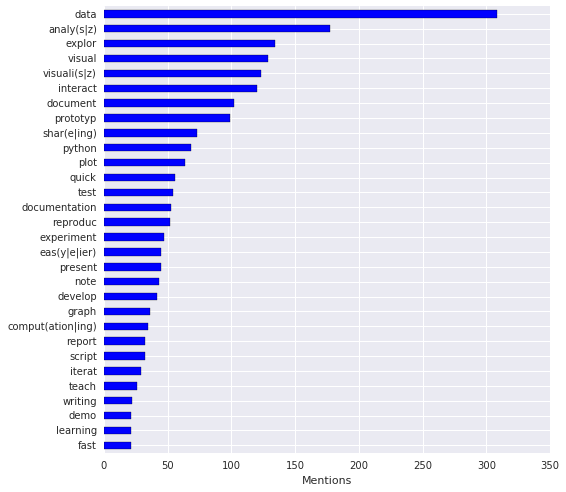

In [85]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

In [121]:
hits = responses.map(lambda text: keywords_or(text, ['visuali(s|z)']))

In [122]:
responses[hits]

103                                                                                             data visualization
157                                                                                           inline visualization
179                                                                                                  visualisation
264                                                  simple to use interactive visualization via bokeh and plot.ly
278                                                         python scripting and publishing incl js visualisations
303                                               Integrating text, mathematical formulas, code and visualizations
358                                                                                                  visualisation
406                                                                                             Data visualization
425                                                                    The need 